In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"E:\Users\TANISHQ\Desktop\Sustain Farmers Project\family_financial_and_transactions_data.csv")

In [3]:
dataset

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,07-10-2024,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,16-10-2024,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,17-10-2024,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,25-10-2024,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,25-10-2024,Education,206.42,113810,20234,5781,2422,2959,2,68
...,...,...,...,...,...,...,...,...,...,...,...,...
16301,FAM200,FAM200_Member6,10-10-2024,Groceries,79.99,44621,44081,4296,2470,2831,4,92
16302,FAM200,FAM200_Member6,22-10-2024,Education,228.39,44621,44081,4296,2470,2831,4,92
16303,FAM200,FAM200_Member6,29-10-2024,Travel,258.63,44621,44081,4296,2470,2831,4,92
16304,FAM200,FAM200_Member6,26-10-2024,Travel,467.46,44621,44081,4296,2470,2831,4,92


In [5]:
dataset.isna().any()

Family ID                  False
Member ID                  False
Transaction Date           False
Category                   False
Amount                     False
Income                     False
Savings                    False
Monthly Expenses           False
Loan Payments              False
Credit Card Spending       False
Dependents                 False
Financial Goals Met (%)    False
dtype: bool

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Family ID                16306 non-null  object 
 1   Member ID                16306 non-null  object 
 2   Transaction Date         16306 non-null  object 
 3   Category                 16306 non-null  object 
 4   Amount                   16306 non-null  float64
 5   Income                   16306 non-null  int64  
 6   Savings                  16306 non-null  int64  
 7   Monthly Expenses         16306 non-null  int64  
 8   Loan Payments            16306 non-null  int64  
 9   Credit Card Spending     16306 non-null  int64  
 10  Dependents               16306 non-null  int64  
 11  Financial Goals Met (%)  16306 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.5+ MB


In [10]:
dataset.describe()

,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
count,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000
mean,256.368534,90340.503925,24473.998038,3948.522384,2529.978965,1782.880535,3.201521,59.418006
std,141.153813,34740.834136,14828.955695,1689.987801,1384.105561,716.595101,1.468880,23.444304
min,10.030000,30851.000000,1037.000000,1013.000000,3.000000,510.000000,0.000000,21.000000
25%,134.820000,59871.000000,11016.000000,2582.000000,1390.000000,1221.000000,2.000000,37.000000
50%,256.055000,90142.000000,25504.000000,3721.000000,2548.000000,1705.000000,3.000000,58.000000
75%,379.240000,119733.000000,37422.000000,5450.000000,3724.000000,2422.000000,4.000000,79.000000
max,499.910000,149871.000000,49217.000000,6968.000000,4974.000000,2999.000000,5.000000,100.000000


* ##### Average Income: 90k
* ##### Avg.Savings: 24.4k
* ##### Avg.Monthly Expenses: 3.9K

In [84]:
# Member Category wise expense
member_data = dataset.groupby(['Family ID', 'Member ID']).agg({
    'Monthly Expenses': 'sum',
    'Category': lambda x: x.value_counts().idxmax()
}).reset_index()
print(member_data.head(10))

  Family ID       Member ID  Monthly Expenses       Category
0    FAM001  FAM001_Member1            156087     Healthcare
1    FAM001  FAM001_Member2            167649         Travel
2    FAM001  FAM001_Member3             63591      Education
3    FAM001  FAM001_Member4            150306  Entertainment
4    FAM002  FAM002_Member1             67560     Healthcare
5    FAM002  FAM002_Member2             78820      Utilities
6    FAM002  FAM002_Member3            152010  Entertainment
7    FAM002  FAM002_Member4             67560      Groceries
8    FAM002  FAM002_Member5            129490      Utilities
9    FAM003  FAM003_Member1            100358      Education


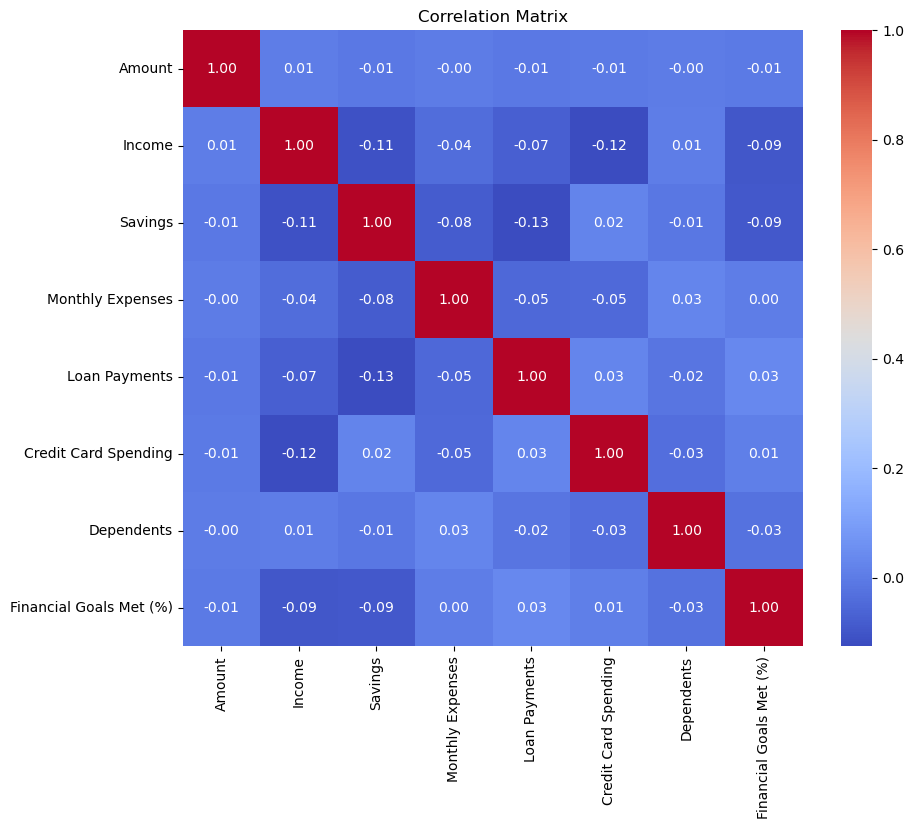

In [24]:
# Extract relevant numerical data from dataset
df = dataset.iloc[:,4:]

# Computer correlation matrix
correlation_matrix = df.corr()

# Visualise correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [65]:
# Compute correlation between Savings and Monthly Expenses
savings_monthlyexpenses_correlation = df['Savings'].corr(df['Monthly Expenses'])
print(f"Correlation between Savings and Monthly Expenses: {savings_monthlyexpenses_correlation}")

Correlation between Savings and Monthly Expenses: -0.08209422498296176


In [178]:
custom_aggregation = dataset.groupby('Family ID').agg(
    total_expenses=('Monthly Expenses', 'sum'),
    average_income=('Income', 'mean'),
    max_savings=('Savings', 'max')
).reset_index()
print(custom_aggregation)

    Family ID  total_expenses  average_income  max_savings
0      FAM001          537633        113810.0        20234
1      FAM002          495440         44592.0        29492
2      FAM003          248254         33278.0        11365
3      FAM004          341145        127196.0        30735
4      FAM005          517440         66048.0         1212
..        ...             ...             ...          ...
195    FAM196          438092         64973.0         3604
196    FAM197          122797        130741.0        41591
197    FAM198          330220        114012.0         6372
198    FAM199          429624         74587.0        28474
199    FAM200          446784         44621.0        44081

[200 rows x 4 columns]


In [192]:
dataset['Category'].unique()

array(['Travel', 'Groceries', 'Healthcare', 'Education', 'Utilities',
       'Food', 'Entertainment'], dtype=object)

In [198]:
#Compute Savings-to-Income Ratio
dataset['Savings_to_Income_Ratio'] = dataset['Savings'] / dataset['Income']

#Compute Monthly Expenses as a Percentage of Income
dataset['Monthly_Expenses_Ratio'] = dataset['Monthly Expenses'] / dataset['Income']

#Compute Loan Payments as a Percentage of Income
dataset['Loan_Payments_Ratio'] = dataset['Loan Payments'] / dataset['Income']

#Compute Credit Card Spending Ratio
dataset['Credit_Card_Spending_Ratio'] = dataset['Credit Card Spending'] / dataset['Income']

In [200]:
dataset.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),Savings_to_Income_Ratio,Monthly_Expenses_Ratio,Loan_Payments_Ratio,Credit_Card_Spending_Ratio
0,FAM001,FAM001_Member1,07-10-2024,Travel,409.12,113810,20234,5781,2422,2959,2,68,0.177788,0.050795,0.021281,0.025999
1,FAM001,FAM001_Member1,16-10-2024,Travel,270.91,113810,20234,5781,2422,2959,2,68,0.177788,0.050795,0.021281,0.025999
2,FAM001,FAM001_Member1,17-10-2024,Groceries,91.10,113810,20234,5781,2422,2959,2,68,0.177788,0.050795,0.021281,0.025999
3,FAM001,FAM001_Member1,25-10-2024,Healthcare,198.23,113810,20234,5781,2422,2959,2,68,0.177788,0.050795,0.021281,0.025999
4,FAM001,FAM001_Member1,25-10-2024,Education,206.42,113810,20234,5781,2422,2959,2,68,0.177788,0.050795,0.021281,0.025999


In [201]:
#Normalize Savings (Higher is better)
dataset['Normalized_Savings'] = dataset['Savings_to_Income_Ratio'].clip(0, 1)

#Normalize Monthly Expenses (Lower is better, so use 1 - ratio)
dataset['Normalized_Expenses'] = (1 - dataset['Monthly_Expenses_Ratio']).clip(0, 1)

#Normalize Loan Payments (Lower is better, so use 1 - ratio)
dataset['Normalized_Loans'] = (1 - dataset['Loan_Payments_Ratio']).clip(0, 1)

#Normalize Credit Card Spending (Lower is better, so use 1 - ratio)
dataset['Normalized_Credit'] = (1 - dataset['Credit_Card_Spending_Ratio']).clip(0, 1)

#Normalize Financial Goals Met (Already a percentage, divide by 100)
dataset['Normalized_Goals'] = dataset['Financial Goals Met (%)'] / 100

In [202]:
dataset.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,...,Financial Goals Met (%),Savings_to_Income_Ratio,Monthly_Expenses_Ratio,Loan_Payments_Ratio,Credit_Card_Spending_Ratio,Normalized_Savings,Normalized_Expenses,Normalized_Loans,Normalized_Credit,Normalized_Goals
0,FAM001,FAM001_Member1,07-10-2024,Travel,409.12,113810,20234,5781,2422,2959,...,68,0.177788,0.050795,0.021281,0.025999,0.177788,0.949205,0.978719,0.974001,0.68
1,FAM001,FAM001_Member1,16-10-2024,Travel,270.91,113810,20234,5781,2422,2959,...,68,0.177788,0.050795,0.021281,0.025999,0.177788,0.949205,0.978719,0.974001,0.68
2,FAM001,FAM001_Member1,17-10-2024,Groceries,91.10,113810,20234,5781,2422,2959,...,68,0.177788,0.050795,0.021281,0.025999,0.177788,0.949205,0.978719,0.974001,0.68
3,FAM001,FAM001_Member1,25-10-2024,Healthcare,198.23,113810,20234,5781,2422,2959,...,68,0.177788,0.050795,0.021281,0.025999,0.177788,0.949205,0.978719,0.974001,0.68
4,FAM001,FAM001_Member1,25-10-2024,Education,206.42,113810,20234,5781,2422,2959,...,68,0.177788,0.050795,0.021281,0.025999,0.177788,0.949205,0.978719,0.974001,0.68


In [217]:
#Identify discretionary categories
discretionary_categories = ['Travel', 'Entertainment']

#Calculate discretionary spending proportion for each family
discretionary_spending = dataset[dataset['Category'].isin(discretionary_categories)].groupby('Family ID')['Amount'].sum() #sum of Amount of travel & entertainment for each family
total_spending = dataset.groupby('Family ID')['Amount'].sum()  #Sum of amount of families

spending_distribution = (discretionary_spending / total_spending).fillna(0).reset_index(name='Discretionary_Spending_Ratio')

#Merge the discretionary spending ratio back into the dataset
family_data = dataset[['Family ID']].drop_duplicates().merge(spending_distribution, on='Family ID', how='left')

family_data['Discretionary_Spending_Ratio'] = family_data['Discretionary_Spending_Ratio'].fillna(0)

#Normalize Discretionary Spending (Lower is better, so use 1 - ratio)
family_data['Normalized_Discretionary_Spending'] = (1 - family_data['Discretionary_Spending_Ratio']).clip(0, 1)


In [218]:
dataset.head(1)

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,...,Financial Goals Met (%),Savings_to_Income_Ratio,Monthly_Expenses_Ratio,Loan_Payments_Ratio,Credit_Card_Spending_Ratio,Normalized_Savings,Normalized_Expenses,Normalized_Loans,Normalized_Credit,Normalized_Goals
0,FAM001,FAM001_Member1,07-10-2024,Travel,409.12,113810,20234,5781,2422,2959,...,68,0.177788,0.050795,0.021281,0.025999,0.177788,0.949205,0.978719,0.974001,0.68


In [219]:
family_data.head()

,Family ID,Discretionary_Spending_Ratio,Normalized_Discretionary_Spending
0,FAM001,0.377149,0.622851
1,FAM002,0.256324,0.743676
2,FAM003,0.350888,0.649112
3,FAM004,0.265068,0.734932
4,FAM005,0.283776,0.716224


In [222]:
weights = {
    'Savings_to_Income_Ratio': 0.25,  # Savings are highly important
    'Monthly_Expenses_Ratio': 0.25,  # Expenses directly affect financial health
    'Loan_Payments_Ratio': 0.20,      # Loan payments are moderately important
    'Credit_Card_Spending_Ratio': 0.15,  # Credit card spending has moderate impact
    'Financial_Goals_Met': 0.10,      # Goals met have a smaller impact
    'Discretionary_Spending_Ratio': 0.05  # Discretionary spending has the least weight
}

In [223]:
#Compute the Financial Score
family_data['Financial_Score'] = (
    weights['Savings_to_Income_Ratio'] * dataset['Normalized_Savings'] +
    weights['Monthly_Expenses_Ratio'] * dataset['Normalized_Expenses'] +
    weights['Loan_Payments_Ratio'] * dataset['Normalized_Loans'] +
    weights['Credit_Card_Spending_Ratio'] * dataset['Normalized_Credit'] +
    weights['Financial_Goals_Met'] * dataset['Normalized_Goals'] +
    weights['Discretionary_Spending_Ratio'] * family_data['Normalized_Discretionary_Spending']
) * 100

In [224]:
#Display the updated scores
print(family_data[['Family ID', 'Financial_Score']])

    Family ID  Financial_Score
0      FAM001        72.273450
1      FAM002        72.877576
2      FAM003        72.404756
3      FAM004        72.833855
4      FAM005        72.740316
..        ...              ...
195    FAM196        76.652715
196    FAM197        76.763913
197    FAM198        75.869903
198    FAM199        76.364716
199    FAM200        75.883848

[200 rows x 2 columns]


### Financial Score Computation
We computed financial scores based on the following metrics:

1. **Savings-to-Income Ratio**: Higher savings relative to income increase the score.
2. **Monthly Expenses Ratio**: Lower monthly expenses relative to income increase the score.
3. **Loan Payments Ratio**: Lower loan repayments relative to income increase the score.
4. **Credit Card Spending Ratio**: Lower credit card spending relative to income increases the score.
5. **Financial Goals Met (%)**: Higher percentages positively influence the score.

#### Formula
The score is calculated as a weighted sum of normalized metrics:
- **Savings-to-Income Ratio**: 30% weight
- **Monthly Expenses Ratio**: 25% weight
- **Loan Payments Ratio**: 20% weight
- **Credit Card Spending Ratio**: 15% weight
- **Financial Goals Met (%)**: 10% weight

#### Result
The final scores are displayed for each family, representing their overall financial health on a scale of 0–100.

In [247]:
#Family with Maximum Financial Score
family_data[['Family ID', 'Financial_Score']].sort_values(by='Financial_Score').head(1)

,Family ID,Financial_Score
90,FAM091,71.927146


In [248]:
#Family with Maximum Financial Score
family_data[['Family ID', 'Financial_Score']].sort_values(by='Financial_Score', ascending=False).head(1)

,Family ID,Financial_Score
177,FAM178,81.547053


In [249]:
family_data

,Family ID,Discretionary_Spending_Ratio,Normalized_Discretionary_Spending,Financial_Score
0,FAM001,0.377149,0.622851,72.273450
1,FAM002,0.256324,0.743676,72.877576
2,FAM003,0.350888,0.649112,72.404756
3,FAM004,0.265068,0.734932,72.833855
4,FAM005,0.283776,0.716224,72.740316
...,...,...,...,...
195,FAM196,0.204135,0.795865,76.652715
196,FAM197,0.181895,0.818105,76.763913
197,FAM198,0.360697,0.639303,75.869903
198,FAM199,0.261734,0.738266,76.364716


#### Spending Distribution Across Categories

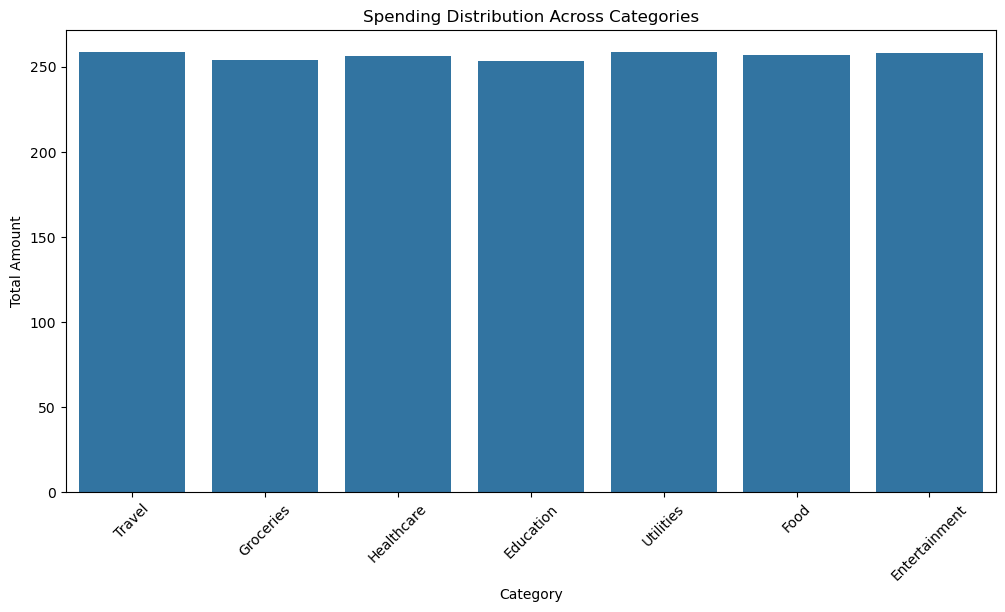

In [256]:
plt.figure(figsize=(12, 6))
sns.barplot(data=dataset, x='Category', y='Amount', errorbar=None)
plt.xticks(rotation=45)
plt.title('Spending Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.show()

#### Family-wise Financial Scores.

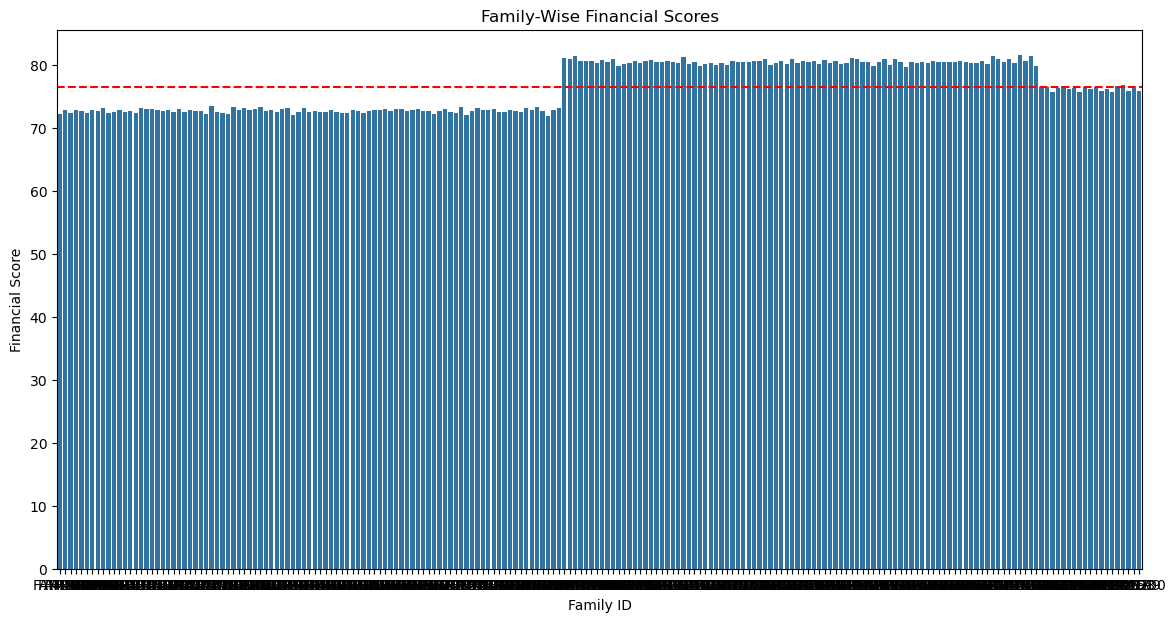

In [275]:
plt.figure(figsize=(14, 7))
#Compute the average financial score
average_financial_score = family_data['Financial_Score'].mean()
sns.barplot(data=family_data, x='Family ID', y='Financial_Score', errorbar=None)
plt.axhline(average_financial_score, color='red', linestyle='--', label=f'Average Financial Score: {average_financial_score:.2f}')
plt.title('Family-Wise Financial Scores')
plt.xlabel('Family ID')
plt.ylabel('Financial Score')
plt.show()

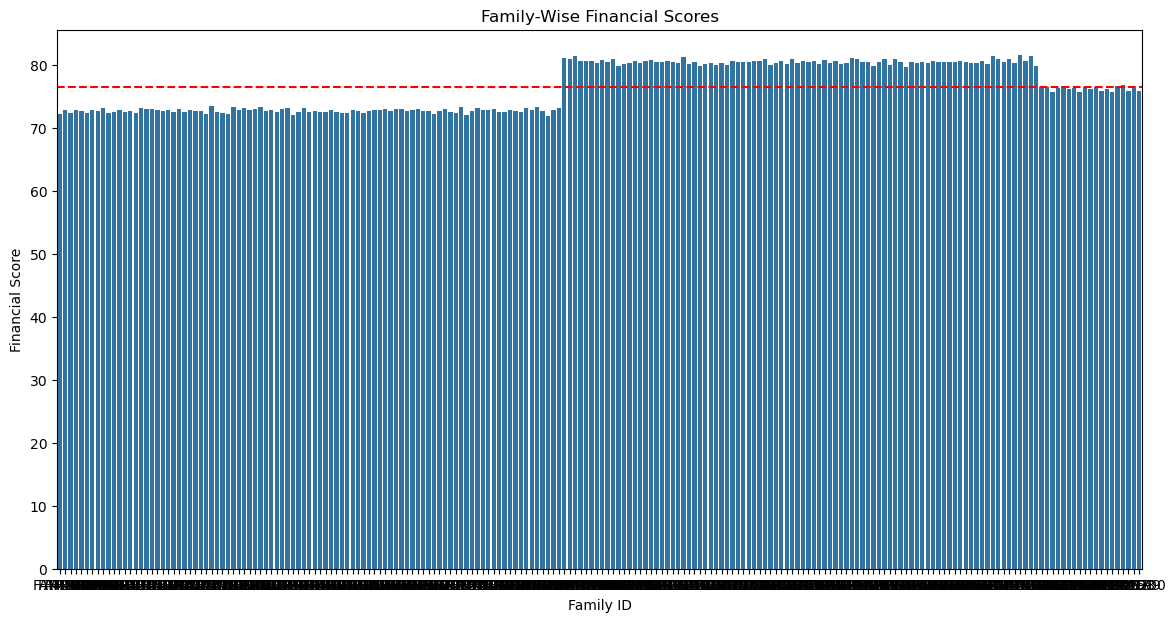

In [273]:
plt.figure(figsize=(14, 7))

#Compute the average financial score
average_financial_score = family_data['Financial_Score'].mean()

sns.barplot(data=family_data, x='Family ID', y='Financial_Score', errorbar=None)
plt.axhline(average_financial_score, color='red', linestyle='--', label=f'Average Financial Score: {average_financial_score:.2f}')
plt.title('Family-Wise Financial Scores')
plt.xlabel('Family ID')
plt.ylabel('Financial Score')
plt.show()

#### Member-wise Spending Trends.

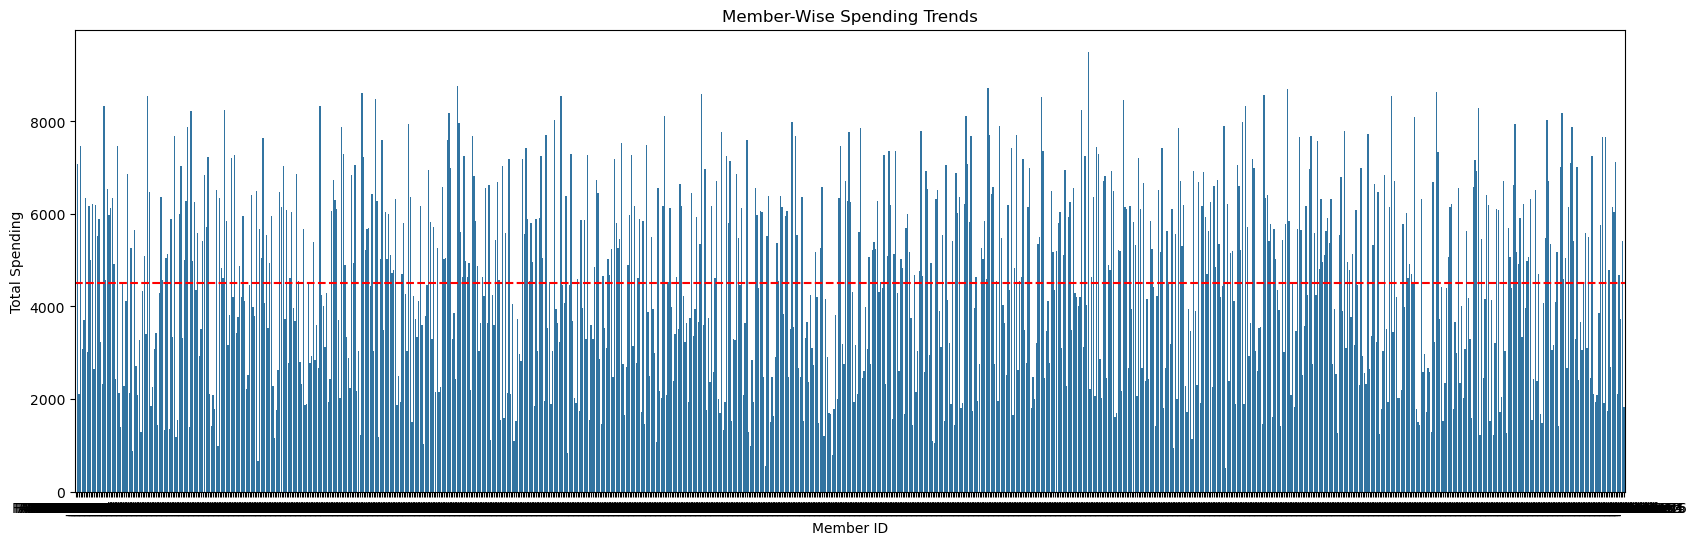

In [272]:
member_spending = dataset.groupby(['Member ID']).agg(total_spent=('Amount', 'sum')).reset_index()

#Compute the average total spending
average_spending = member_spending['total_spent'].mean()

plt.figure(figsize=(20, 6))
sns.barplot(data=member_spending, x='Member ID', y='total_spent', errorbar=None)
plt.axhline(average_spending, color='red', linestyle='--', label=f'Average Spending: {average_spending:.2f}')
plt.title('Member-Wise Spending Trends')
plt.xlabel('Member ID')
plt.ylabel('Total Spending')
plt.show()